### Context

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

### Feature Selection

This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

#### Load Dataset

In [5]:
super <- read.csv("Supermarket - Sales Data.csv")
head(super)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


#### Explore the dataset

In [6]:
# Summary
summary(super)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

In [7]:
# Structure of the dataset
str(super)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

In [8]:
# Dimension of the dataset
dim(super)

[1] 1000   16

In [9]:
# Change datatypes to the correct ones:

# To Numeric datatype
g = c('Branch', 'Gender','Customer.type', 'Product.line', 'Payment')
for (i in g){
    super[,i] = as.numeric(super[,i])
}

In [10]:
# Add a column for total sales
library(dplyr)
super <- super %>% mutate(Sales = Tax+Total)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [11]:
head(super)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Sales
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,1,1,1,4,74.69,7,26.1415,1/5/2019,13:08,3,522.83,4.761905,26.1415,9.1,548.9715,575.113
2,226-31-3081,3,2,1,1,15.28,5,3.8200,3/8/2019,10:29,1,76.40,4.761905,3.8200,9.6,80.2200,84.040
3,631-41-3108,1,2,2,5,46.33,7,16.2155,3/3/2019,13:23,2,324.31,4.761905,16.2155,7.4,340.5255,356.741
4,123-19-1176,1,1,2,4,58.22,8,23.2880,1/27/2019,20:33,3,465.76,4.761905,23.2880,8.4,489.0480,512.336
5,373-73-7910,1,2,2,6,86.31,7,30.2085,2/8/2019,10:37,3,604.17,4.761905,30.2085,5.3,634.3785,664.587
6,699-14-3026,3,2,2,1,85.39,7,29.8865,3/25/2019,18:30,3,597.73,4.761905,29.8865,4.1,627.6165,657.503


In [12]:
# Drop columns that are not necessary
# Data <- subset( Data, select = -c(d, b ) )

super <- subset( super, select = -c(Invoice.ID, Date, Time ) )

In [13]:
names(super)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Payment"                
 [9] "cogs"                    "gross.margin.percentage"
[11] "gross.income"            "Rating"                 
[13] "Total"                   "Sales"

#### Feature Selection

By definition, feature selection (or variable selection attribute selection) is the process done before model construction where a subset of relevant features are selected. The process reduces the no. of features in a dataset by excluding or including them without any change as opposed to dimensionality reduction methods which do so by creating new combinations of features. 

The main objective of feature selection is to create an accurate predictive model by selecting features that would give us a better accuracy while requiring less data. In turn, irrelevant and redundant attributes would be removed resulting to a set that is less complex to work with and understand. 

##### Using Filter Method

In [14]:
# Installing and loading our caret package
# 
# suppressWarnings(
#         suppressMessages(if
#                          (!require(caret, quietly=TRUE))
#                 install.packages("caret")))
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2


In [15]:
# Loading the corrplot package for plotting
# ---
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [16]:
# Remove columns with standard deviation of zero
data.num <- super[, sapply(super, is.numeric)]

data.num <- data.num[, !sapply(data.num, function(x) { sd(x) == 0} )]

In [17]:
# Calculating the correlation matrix
# ---
#
correlationMatrix <- cor(data.num)

In [18]:
# Find attributes that are highly correlated
# ---
#
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

In [19]:
# Highly correlated attributes
# ---
# 
highlyCorrelated

names(data.num[,highlyCorrelated])

[1]  9 12  7 10

[1] "cogs"         "Total"        "Tax"          "gross.income"

We observe 4 colums whcih were highly correlated, that is 

- cogs

- Total

- Tax 

- gross.income

In [20]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below
# ---
# 
# Removing Redundant Features 
# ---
# 
super2<-data.num[-highlyCorrelated]

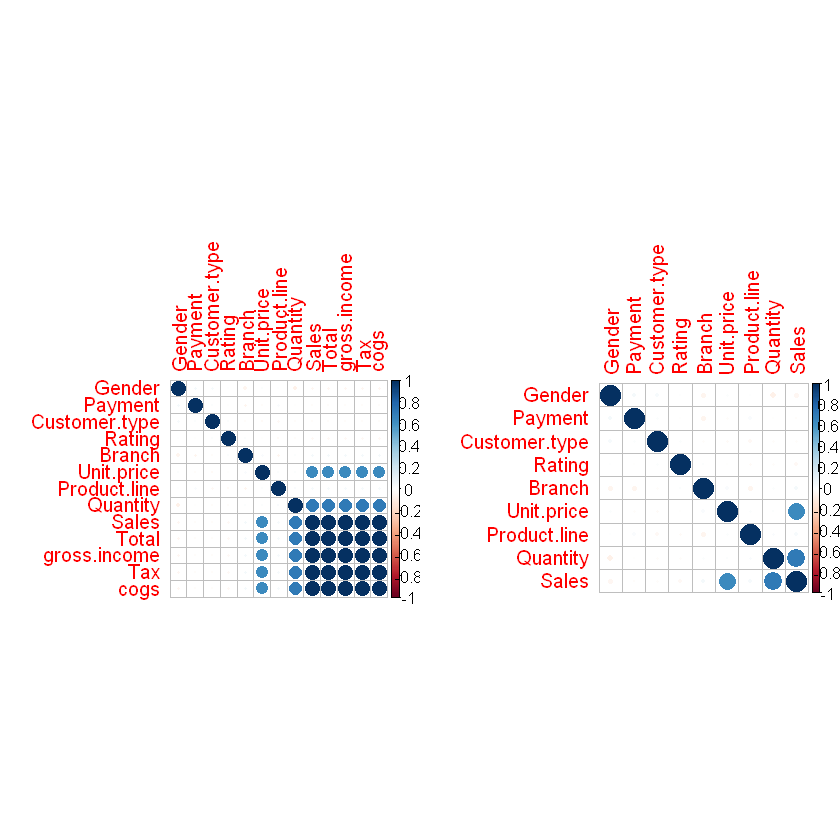

In [21]:
# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(super2), order = "hclust")

After feature selection we see that irrelevant and redundant features have been removed